<a href="https://colab.research.google.com/github/OSGeoLabBp/tutorials/blob/master/english/machine_learning/lessons/mnist_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import keras
from keras import layers

In [9]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [14]:
# use a sub set
# n_train = x_train.shape[0]        # full set used
n_train = 100                       # subset used
if n_train < x_train.shape[0]:
    n_test = n_train // 6
    x_train = x_train[:n_train]
    y_train = y_train[:n_train]
    x_test = x_test[:n_test]
    y_test = y_test[:n_test]

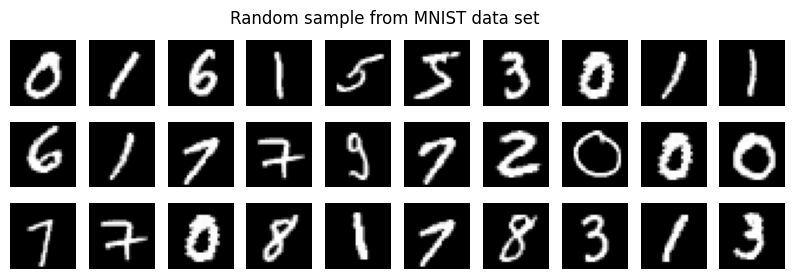

In [16]:
rand_ind = np.random.randint(0, x_train.shape[0], size=30)
fig, axs = plt.subplots(3, 10, figsize=(10, 3))
fig.suptitle('Random sample from MNIST data set')
axs = axs.ravel()
k = 0
for ax in axs:
    ax.axis("off")
    ax.imshow(x_train[rand_ind[k]], cmap='gray')
    k+= 1

In [5]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (100, 28, 28, 1)
100 train samples
60 test samples


In [6]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [7]:
batch_size = 128
epochs = 25

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Epoch 1/25
1/1 [==============================] - 9s 9s/step - loss: 2.3133 - accuracy: 0.1111 - val_loss: 2.2684 - val_accuracy: 0.1000
Epoch 2/25
1/1 [==============================] - 0s 91ms/step - loss: 2.2802 - accuracy: 0.1444 - val_loss: 2.2384 - val_accuracy: 0.4000
Epoch 3/25
1/1 [==============================] - 0s 154ms/step - loss: 2.2325 - accuracy: 0.2111 - val_loss: 2.2115 - val_accuracy: 0.2000
Epoch 4/25
1/1 [==============================] - 0s 104ms/step - loss: 2.1788 - accuracy: 0.2556 - val_loss: 2.1859 - val_accuracy: 0.2000
Epoch 5/25
1/1 [==============================] - 0s 171ms/step - loss: 2.1451 - accuracy: 0.2778 - val_loss: 2.1590 - val_accuracy: 0.2000
Epoch 6/25
1/1 [==============================] - 0s 145ms/step - loss: 2.1182 - accuracy: 0.3444 - val_loss: 2.1299 - val_accuracy: 0.2000
Epoch 7/25
1/1 [==============================] - 0s 102ms/step - loss: 2.0923 - accuracy: 0.3333 - val_loss: 2.1000 - val_accuracy: 0.2000
Epoch 8/25
1/1 [========

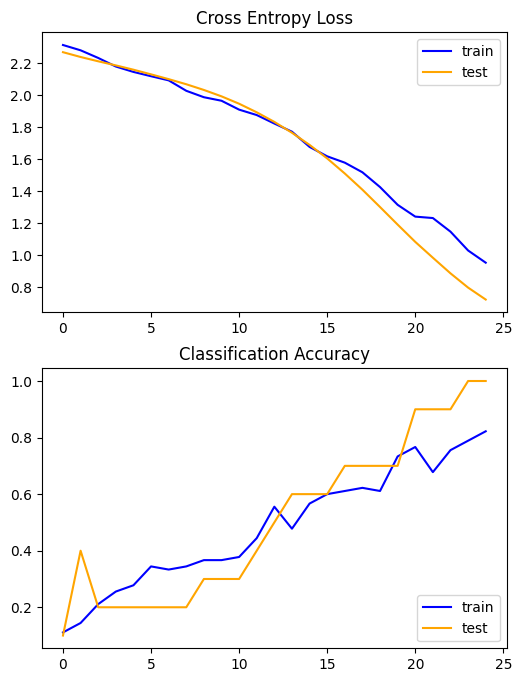

In [8]:
# plot diagnostic learning curves
fig, ax = plt.subplots(2, 1, figsize=(6, 8))
ax[0].set_title('Cross Entropy Loss')
ax[0].plot(history.history['loss'], color='blue', label='train')
ax[0].plot(history.history['val_loss'], color='orange', label='test')
ax[0].legend()
# plot accuracy
ax[1].set_title('Classification Accuracy')
ax[1].plot(history.history['accuracy'], color='blue', label='train')
ax[1].plot(history.history['val_accuracy'], color='orange', label='test')
ax[1].legend(loc=4)
plt.subplots_adjust(wspace=0.5)
